# Linear Models and Least Squares

Linear models are statistical models that use linear equations to describe relationships between variables. They are widely used in various fields, including economics, engineering, and social sciences.

## Least Squares Regression

Least squares regression is a method of estimating the coefficients of a linear model by minimizing the sum of squared differences between the observed and predicted values. The least squares method is widely used due to its simplicity and interpretability.

The equation for a simple linear regression model is:

$y = \beta_0 + \beta_1 x + \epsilon$

where:

- $y$ is the dependent variable
- $x$ is the independent variable
- $\beta_0$ is the intercept
- $\beta_1$ is the slope
- $\epsilon$ is the error term

The goal of least squares regression is to find the values of $\beta_0$ and $\beta_1$ that minimize the sum of squared errors:

$\sum_{i=1}^n (y_i - \hat{y}_i)^2$

where:

- $y_i$ is the observed value of the dependent variable for the $i$th observation
- $\hat{y}_i$ is the predicted value of the dependent variable for the $i$th observation

This can be solved using the normal equation:

$X^TX\beta = X^Ty$


where:

- $X$ is the design matrix of independent variables
- $y$ is the vector of observed values of the dependent variable
- $\beta$ is the vector of coefficients to be estimated


To solve for $\beta$, we can multiply both sides by $(X^TX)^{-1}$:

$\beta = (X^TX)^{-1}X^Ty$

However, if $X^TX$ is singular (not of full rank), then it does not have an inverse and the above equation cannot be solved using this method. 

A singular matrix means that some of the columns in $X$ are linearly dependent on other columns. This can cause issues in calculating the inverse of $X^TX$ because it requires dividing by zero. In this case, alternative methods such as the SVD or ridge regression may be used to estimate the coefficients. 


## Statistical Decision Theory

Statistical decision theory is a framework for decision-making that considers probabilities, costs, and benefits of various actions. In the context of linear models, this theory helps in determining the best model or method to use, considering various factors like model complexity, error rates, and the trade-off between bias and variance.

# Nearest Neighbors

Nearest Neighbors is a non-parametric machine learning algorithm used for classification and regression tasks. It works by finding the most similar data points in the training dataset to a given input and making predictions based on their values.

## Algorithm

The algorithm can be summarized in the following steps:

1. Calculate the distance between the input and all data points in the training set using a distance metric.
2. Select the k nearest neighbors based on their distance to the input.
3. For classification tasks, assign the input to the class that is most frequent among the k nearest neighbors. For regression tasks, predict the output as the mean or median of the output values of the k nearest neighbors.

The choice of distance metric can significantly impact the performance of the algorithm. Some common distance metrics used in Nearest Neighbors include:

### Euclidean Distance

The Euclidean distance between two points $p$ and $q$ in $n$-dimensional space is given by:

$dist(p, q) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}$

where $p_i$ and $q_i$ are the $i$th components of $p$ and $q$, respectively.

### Manhattan Distance

The Manhattan distance between two points $p$ and $q$ in $n$-dimensional space is given by:

$dist(p, q) = \sum_{i=1}^n |p_i - q_i|$

### Minkowski Distance

The Minkowski distance between two points $p$ and $q$ in $n$-dimensional space is given by:

$dist(p, q) = \left(\sum_{i=1}^n |p_i - q_i|^p\right)^{\frac{1}{p}}$

where $p$ is a parameter that determines the order of the distance metric. When $p=1$, the Minkowski distance is equivalent to the Manhattan distance. When $p=2$, it is equivalent to the Euclidean distance.

## Hyperparameters

The Nearest Neighbors algorithm has a hyperparameter k, which determines the number of nearest neighbors to consider when making predictions. The choice of k can significantly impact the performance of the algorithm. A small value of k may result in overfitting, while a large value of k may result in underfitting.

## Pros and Cons

### Pros

- Simple and easy to implement.
- Non-parametric, meaning it does not make assumptions about the underlying distribution of the data.
- Can be used for both classification and regression tasks.

### Cons

- May be computationally expensive for large datasets.
- Performance can be sensitive to the choice of distance metric and hyperparameters.
- May not perform well when the feature space is high-dimensional or when there is a lot of noise in the data.

Here's the formula for predicting the output using k-nearest neighbors:

For regression tasks, the predicted output $\hat{y}$ for a given input $x$ is calculated as the mean or median of the output values of the k nearest neighbors in the training set:

$\hat{y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$

where:

- $N_k(x)$ is the set of k nearest neighbors to $x$ in the training set, as determined by a distance metric.
- $y_i$ is the output value of the $i$th nearest neighbor in $N_k(x)$.

This formula takes the average output of the k nearest neighbors as the predicted output for the input. The value of k can be chosen by cross-validation or other methods to optimize performance.

In summary, Nearest Neighbors is a simple and versatile algorithm that can be used for both classification and regression tasks. However, it is important to carefully choose the distance metric and hyperparameters to achieve good performance.

# Least Squares Regression vs Nearest Neighbors

Least Squares Regression and Nearest Neighbors are two popular machine learning algorithms used for regression problems. Here are some of the key differences between these methods:

## Model Type and Assumptions

Least Squares Regression is a parametric method that assumes a linear relationship between the independent and dependent variables. It estimates the coefficients of the linear equation by minimizing the sum of squared differences between observed and predicted values. In contrast, Nearest Neighbors is a non-parametric algorithm that makes no assumptions about the underlying data distribution. It stores the entire training dataset and makes predictions based on the similarity between data points.

## Learning Approach

Least Squares Regression is an eager learning approach, which means that it builds a model based on the entire training dataset before making predictions on new data. In contrast, Nearest Neighbors is a lazy learning approach, which means that it does not build a model but rather stores the entire training dataset and makes predictions based on the similarity between the new data point and the stored data points.

## Flexibility and Complexity

Nearest Neighbors is more flexible and can model complex relationships, unlike Least Squares Regression which assumes a linear relationship. However, Nearest Neighbors may suffer from increased computational complexity due to the storage and distance calculation requirements.

## Interpretability

Least Squares Regression models are generally easier to interpret because they involve a simple linear equation. The coefficients of the equation can be used to understand the relationship between the independent and dependent variables. In contrast, Nearest Neighbors models lack an explicit structure, making them less interpretable.

## Robustness and Sensitivity

Nearest Neighbors is more robust to outliers and noisy data compared to Least Squares Regression, which can be heavily influenced by extreme values. However, Nearest Neighbors can be sensitive to the choice of distance metric and the value of 'k', which determines the number of nearest neighbors to consider.

## Equations

The equation for Least Squares Regression is:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$

where:

- $y$ is the dependent variable
- $x_1, x_2, ..., x_p$ are the independent variables
- $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the coefficients to be estimated
- $\epsilon$ is the error term

The goal of Least Squares Regression is to find the values of $\beta_0, \beta_1, \beta_2, ..., \beta_p$ that minimize the sum of squared errors:

$\sum_{i=1}^n (y_i - \hat{y}_i)^2$

where:

- $y_i$ is the observed value of the dependent variable for the $i$th observation
- $\hat{y}_i$ is the predicted value of the dependent variable for the $i$th observation

The equation for Nearest Neighbors is:

$\hat{y} = \frac{1}{k} \sum_{i=1}^k y_i$

where:

- $\hat{y}$ is the predicted value of the dependent variable for the new data point
- $y_i$ are the observed values of the dependent variable for the $k$ nearest neighbors
- $k$ is a user-defined parameter that specifies the number of nearest neighbors to consider.

# Shrinkage Methods

Shrinkage methods are regression techniques that use regularization to improve model performance and prevent overfitting. Two commonly used shrinkage methods are Ridge Regression and Lasso Regression.

## Ridge Regression

Ridge Regression is a linear regression technique that incorporates L2 regularization, which adds a penalty term proportional to the square of the coefficients. The Ridge Regression objective function can be written as:

$J(\beta) = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2$

where:

- $y_i$ is the observed value of the dependent variable for the $i$th observation
- $x_{ij}$ is the value of the $j$th independent variable for the $i$th observation
- $\beta_0$ is the intercept term
- $\beta_j$ is the coefficient for the $j$th independent variable
- $\lambda$ is the regularization parameter that controls the amount of shrinkage applied to the coefficients

The Ridge Regression penalty term shrinks the coefficients towards zero, but does not result in exact zeros. This approach helps prevent overfitting and reduces multicollinearity in the model.

## Lasso Regression

Lasso Regression is another linear regression technique that uses L1 regularization, adding a penalty term proportional to the absolute value of the coefficients. The Lasso Regression objective function can be written as:

$J(\beta) = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^p |\beta_j|$

where the variables are defined as in Ridge Regression.

The Lasso Regression penalty term encourages some coefficients to be exactly zero, effectively performing feature selection and resulting in sparse models. This can be useful when dealing with high-dimensional datasets, where many of the independent variables may not be relevant to the dependent variable.

## Comparison

Both Ridge and Lasso Regression aim to address overfitting and improve model generalization. Ridge Regression tends to shrink coefficients uniformly, while Lasso Regression can shrink some coefficients to zero, simplifying the model. The choice between Ridge and Lasso Regression depends on the specific problem and the nature of the data.

## Bayesian Perspective

Ridge and Lasso Regression can be viewed through a Bayesian lens. Ridge Regression corresponds to placing a Gaussian prior on the coefficients, leading to a maximum a posteriori (MAP) estimate that is equivalent to minimizing the L2 regularization term. In contrast, Lasso Regression corresponds to placing a Laplace prior on the coefficients, resulting in a MAP estimate that minimizes the L1 regularization term. This Bayesian interpretation helps explain the differences in behavior between the two techniques.

In Bayesian statistics, the goal is to estimate the posterior distribution of the model parameters given the observed data. The posterior distribution is proportional to the product of the likelihood function and the prior distribution:

$p(\beta | y, X) \propto p(y | X, \beta) p(\beta)$

where:

- $y$ is the vector of observed values of the dependent variable
- $X$ is the design matrix of independent variables
- $\beta$ is the vector of coefficients to be estimated

The likelihood function represents the probability of the observed data given the model parameters. The prior distribution represents the prior beliefs about the model parameters before observing the data.

### Ridge Regression

In Ridge Regression, the prior distribution is assumed to be a multivariate normal distribution with mean 0 and variance $\tau^2$:

$p(\beta) = \frac{1}{(2\pi \tau^2)^{p/2}} \exp \left(-\frac{1}{2\tau^2} \sum_{j=1}^p \beta_j^2 \right)$

where $p$ is the number of independent variables and $\tau^2$ is a hyperparameter that controls the strength of the prior.

The Ridge Regression objective function can be reformulated as maximizing the posterior distribution with a Gaussian prior:

$\hat{\beta}^{ridge} = \arg\max_\beta p(\beta | y, X) \propto p(y | X, \beta) p(\beta)$

which is equivalent to minimizing the negative log posterior:

$J(\beta) = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j)^2 + \frac{\lambda}{2} \sum_{j=1}^p \beta_j^2$

where $\lambda = \frac{1}{\tau^2}$ is the regularization parameter.

### Lasso Regression

In Lasso Regression, the prior distribution is assumed to be a Laplace distribution with mean 0 and scale parameter $\tau$:

$p(\beta) = \prod_{j=1}^p \frac{\tau}{2} \exp \left(-\tau |\beta_j| \right)$

The Lasso Regression objective function can be reformulated as maximizing the posterior distribution with a Laplace prior:

$\hat{\beta}^{lasso} = \arg\max_\beta p(\beta | y, X) \propto p(y | X, \beta) p(\beta)$

which is equivalent to minimizing the negative log posterior:

$J(\beta) = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^p |\beta_j|$

where $\lambda = \frac{1}{\tau}$ is the regularization parameter.

### Comparison

From a Bayesian perspective, Ridge Regression corresponds to placing a Gaussian prior on the coefficients, while Lasso Regression corresponds to placing a Laplace prior on the coefficients. The Gaussian prior leads to a MAP estimate that is equivalent to minimizing the L2 regularization term, while the Laplace prior leads to a MAP estimate that minimizes the L1 regularization term. 

In both cases, the regularization parameter controls the tradeoff between the likelihood of the observed data and the penalty term. As the regularization parameter increases, the penalty term becomes more important and the coefficients are shrunk towards zero, reducing overfitting and improving model generalization. However, Ridge Regression tends to shrink all coefficients towards zero, while Lasso Regression can result in some coefficients being exactly zero, effectively performing feature selection.


# Curse of Dimensionality

The Curse of Dimensionality refers to the phenomenon where the performance of machine learning algorithms deteriorates rapidly as the number of independent variables (features) increases. This is because the number of possible combinations of feature values grows exponentially with the number of dimensions, making it difficult to find meaningful patterns in the data. Shrinkage methods like Ridge and Lasso Regression can be useful in dealing with high-dimensional datasets by reducing the number of irrelevant features and improving model generalization.

## Distance from the Origin to the Closest Data Point

The median distance from the origin to the closest data point is given by:

$d(p,n) = (1 - (1/2)^{1/n})^{1/p}$

where:

- $p$ is the number of dimensions or features.
- $n$ is the number of data points or training examples.

This equation tells us that as the number of dimensions increases, the distance between any two points in the feature space becomes less meaningful. This can make it difficult to identify the nearest neighbors or estimate the model parameters accurately.

The distance from the origin to the closest data point can be derived from the Gaussian distribution in high-dimensional space. 

Consider a set of $n$ independent, identically distributed Gaussian random variables with mean 0 and variance 1, denoted as $X_1, X_2, ..., X_n$. The probability density function of a single $X_i$ variable is given by:

$f(x_i) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x_i^2}{2}}$

The joint probability density function of all the $X_i$ variables is given by:

$f(x_1,x_2,...,x_n) = \frac{1}{(2\pi)^{n/2}} e^{-\frac{1}{2}\sum_{i=1}^n x_i^2}$

This is a multivariate Gaussian distribution with mean 0 and variance 1. 

Now, consider the distance from the origin to a point in this high-dimensional space, denoted as $r$. This distance can be calculated as:

$r^2 = \sum_{i=1}^n x_i^2$

The probability density function of $r$ can be derived by considering the volume of a sphere in high-dimensional space. The volume of an $n$-dimensional sphere with radius $r$ is given by:

$V_n(r) = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)} r^n$

where $\Gamma$ is the gamma function.

The probability density function of $r$ is then given by:

$f(r) = \frac{d}{dr} V_n(r) = \frac{n\pi^{n/2}}{\Gamma(\frac{n}{2}+1)} r^{n-1}$

The expected value of $r$ is then:

$E(r) = \int_0^\infty r f(r) dr = \int_0^\infty r \frac{n\pi^{n/2}}{\Gamma(\frac{n}{2}+1)} r^{n-1} dr = (\frac{n}{2})^{1/n}$

Substituting $p=2$ for the $L^2$ norm (Euclidean distance), we get:

$d(p,n) = E(r) = (\frac{n}{2})^{1/n} = (1 - (1/2)^{1/n})^{1/2}$

Therefore, we have proved the distance from origin equation using the Gaussian distribution in high-dimensional space.

## Impact on Least Squares Regression

In least squares regression, the regression coefficients $\beta$ are estimated by minimizing the sum of squared errors:

$\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2$

Increased number of dimensions or features can lead to overfitting and an increased likelihood of noise in the model. This is because the model has more parameters to estimate and may fit the noise in the data rather than the underlying signal. Increased dimensions can also lead to a need for exponentially more data to train the model.

## Impact on Nearest Neighbors

The nearest neighbors algorithm is a popular method for classification and regression tasks. However, increased dimensionality can make it difficult to identify the k closest neighbors due to most points being equidistant from each other. Increased dimensions can also lead to the need for exponentially more training examples to cover the space, making the algorithm computationally expensive.

## Singularity in X^TX Matrix

In least squares regression, the X^TX matrix is used to estimate the regression coefficients $\beta$. However, as the number of dimensions increases, it is more likely that the X^TX matrix will be singular (not of full rank). This can cause issues in calculating the inverse of X^TX, which is required to estimate $\beta$. 

When the X^TX matrix is singular, alternative methods such as ridge regression or the singular value decomposition (SVD) may be used to estimate the regression coefficients. Ridge regression adds a penalty term to the sum of squared errors to shrink the coefficients towards zero, which can help to overcome the issue of singularity in X^TX. The SVD is a matrix factorization technique that can be used to estimate the coefficients without inverting X^TX.

In summary, the curse of dimensionality can impact the accuracy and computational efficiency of various machine learning algorithms, including least squares regression and nearest neighbors. Increased dimensions can lead to overfitting, a need for exponentially more data, and issues with the singularity of the X^TX matrix. Alternative methods such as ridge regression and the SVD can be used to overcome these issues.

# SVM Class

Linear Support Vector Machines Class

In [6]:
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

SVM Accuracy:  1.0


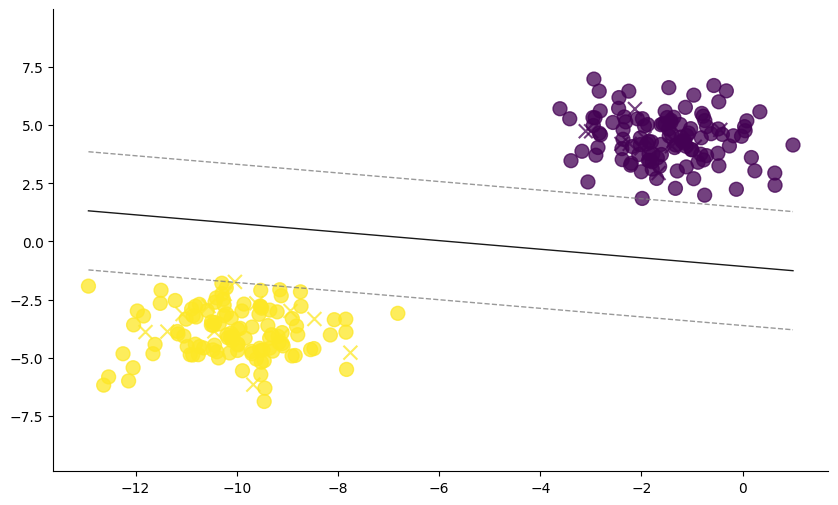

In [7]:
%matplotlib inline

X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)

clf = SVM(n_iters=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))

# plot results
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)
x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)
x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)
ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)
x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

In [8]:
svc = svm.SVC(kernel = 'rbf', C=150, gamma=0.5).fit(X_train, y_train)

y_hat = svc.predict(X_test)

metrics.accuracy_score(y_test,y_hat)



1.0